# Implemenation of TELM 

Normal TELM on the iris dataset

In [11]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

class TELMClassifier:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.output_size = output_size

        # Xavier initialization for weights
        self.weights1 = np.random.randn(input_size, hidden_size1) / np.sqrt(input_size)
        self.bias1 = np.random.randn(hidden_size1)
        self.weights2 = np.random.randn(hidden_size1, hidden_size2) / np.sqrt(hidden_size1)
        self.bias2 = np.random.randn(hidden_size2)

        # Initialize output weights randomly
        self.output_weights = None

    def train(self, X, y):
        # Compute the output of the first hidden layer
        hidden_output1 = np.dot(X, self.weights1) + self.bias1
        hidden_output1 = np.maximum(hidden_output1, 0)  # ReLU activation

        # Compute the output of the second hidden layer
        hidden_output2 = np.dot(hidden_output1, self.weights2) + self.bias2
        hidden_output2 = np.maximum(hidden_output2, 0)  # ReLU activation

        # Compute output weights using Moore-Penrose pseudoinverse
        self.output_weights = np.linalg.pinv(hidden_output2) @ y

    def predict(self, X):
        # Compute the output of the first hidden layer
        hidden_output1 = np.dot(X, self.weights1) + self.bias1
        hidden_output1 = np.maximum(hidden_output1, 0)  # ReLU activation

        # Compute the output of the second hidden layer
        hidden_output2 = np.dot(hidden_output1, self.weights2) + self.bias2
        hidden_output2 = np.maximum(hidden_output2, 0)  # ReLU activation

        # Compute the output
        output = hidden_output2 @ self.output_weights
        return output

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# One-hot encode the target variable
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Normalizing input data
X_train_normalized = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test_normalized = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)

# Initialize and train the TELM classifier
input_size = X_train_normalized.shape[1]
hidden_size1 = 100
hidden_size2 = 100
output_size = y_onehot.shape[1]

telm = TELMClassifier(input_size, hidden_size1, hidden_size2, output_size)
telm.train(X_train_normalized, y_train)

# Make predictions on the test set
y_pred = telm.predict(X_test_normalized)
predicted_labels = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), predicted_labels)
print("Accuracy:", accuracy)


Accuracy: 1.0


C:\Users\pulki\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


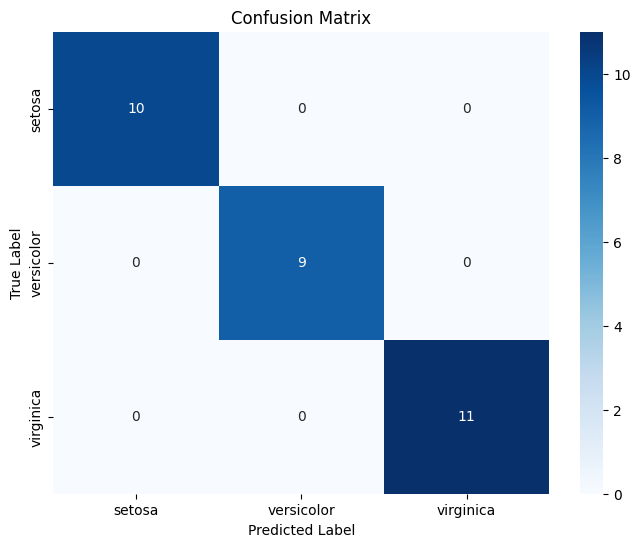

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), predicted_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


TELM for House Price Prediction

In [31]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

class TELMRegressor:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.output_size = output_size

        # Xavier initialization for weights
        self.weights1 = np.random.randn(input_size, hidden_size1) / np.sqrt(input_size)
        self.bias1 = np.random.randn(hidden_size1)
        self.weights2 = np.random.randn(hidden_size1, hidden_size2) / np.sqrt(hidden_size1)
        self.bias2 = np.random.randn(hidden_size2)

        # Initialize output weights randomly
        self.output_weights = None

    def train(self, X, y):
        # Compute the output of the first hidden layer
        hidden_output1 = np.dot(X, self.weights1) + self.bias1
        hidden_output1 = np.maximum(hidden_output1, 0)  # ReLU activation

        # Compute the output of the second hidden layer
        hidden_output2 = np.dot(hidden_output1, self.weights2) + self.bias2
        hidden_output2 = np.maximum(hidden_output2, 0)  # ReLU activation

        # Compute output weights using Moore-Penrose pseudoinverse
        self.output_weights = np.linalg.pinv(hidden_output2) @ y

    def predict(self, X):
        # Compute the output of the first hidden layer
        hidden_output1 = np.dot(X, self.weights1) + self.bias1
        hidden_output1 = np.maximum(hidden_output1, 0)  # ReLU activation

        # Compute the output of the second hidden layer
        hidden_output2 = np.dot(hidden_output1, self.weights2) + self.bias2
        hidden_output2 = np.maximum(hidden_output2, 0)  # ReLU activation

        # Compute the output
        output = hidden_output2 @ self.output_weights
        return output

# Load California housing dataset
california_housing = fetch_california_housing()
X, y = california_housing.data, california_housing.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the TELM regressor
input_size = X_train.shape[1]
hidden_size1 = 100
hidden_size2 = 100
output_size = 1  # Single output for regression

telm = TELMRegressor(input_size, hidden_size1, hidden_size2, output_size)
telm.train(X_train, y_train)

# Make predictions on the test set
y_pred = telm.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.4299119218598506


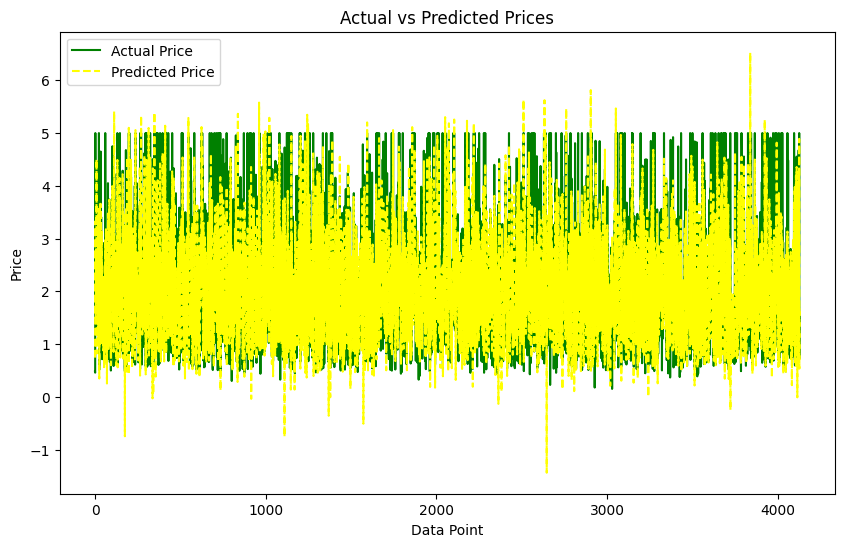

In [35]:
import matplotlib.pyplot as plt

# Plot actual and predicted prices
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, color='green', label='Actual Price')
plt.plot(range(len(y_test)), y_pred, color='yellow', linestyle='--', label='Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Data Point')
plt.ylabel('Price')
plt.legend()
plt.show()


TELM for Breast Cancer Classification

In [114]:
from sklearn.datasets import load_breast_cancer

# Load Breast Cancer dataset
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# One-hot encode the target variable (not necessary for binary classification)
# Since TELMClassifier assumes multi-class classification, we'll one-hot encode
# the target variable. However, for binary classification like breast cancer detection,
# one-hot encoding is not necessary. You can directly use the original labels.
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Normalizing input data
X_train_normalized = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test_normalized = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)

# Initialize and train the TELM classifier
input_size = X_train_normalized.shape[1]
hidden_size1 = 100
hidden_size2 = 100
output_size = y_onehot.shape[1]

telm = TELMClassifier(input_size, hidden_size1, hidden_size2, output_size)
telm.train(X_train_normalized, y_train)


# Make predictions on the test set
y_pred = telm.predict(X_test_normalized)
predicted_labels = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), predicted_labels)
print("Accuracy:", accuracy)


Accuracy: 0.9649122807017544


C:\Users\pulki\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


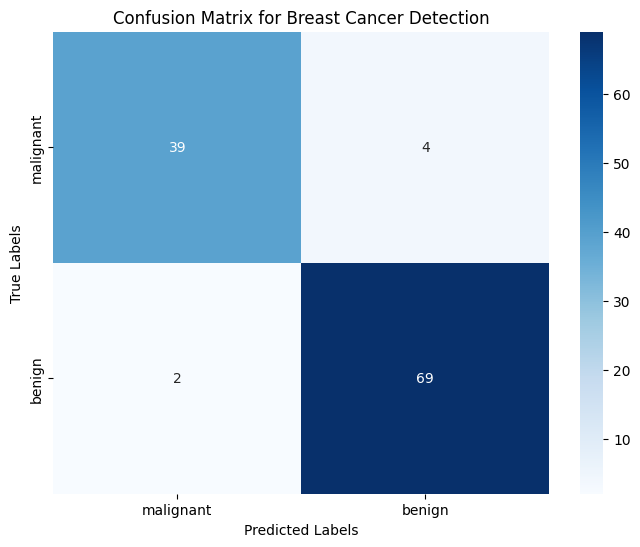

In [38]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), predicted_labels)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=breast_cancer.target_names, yticklabels=breast_cancer.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Breast Cancer Detection')
plt.show()


# TELM used with normalization for better accuracy

In [39]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

class TELMClassifier_N:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, k=2):
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.output_size = output_size
        self.k = k

        # Initialize random weights and biases for the first hidden layer
        self.weights1 = np.random.randn(input_size // k, hidden_size1, k)
        self.bias1 = np.random.randn(hidden_size1)

        # Initialize random weights and biases for the second hidden layer
        self.weights2 = np.random.randn(hidden_size1, hidden_size2)
        self.bias2 = np.random.randn(hidden_size2)

        # Initialize output weights randomly
        self.output_weights = None

    def train(self, X, y):
        # Compute the output of the first hidden layer
        hidden_output1 = np.zeros((X.shape[0], self.hidden_size1))
        for i in range(0, self.input_size, self.k):
            group_input = X[:, i:i+self.k]
            weights1_group = self.weights1[i//self.k].T
            hidden_output1 += np.dot(group_input, weights1_group) + self.bias1

        hidden_output1 = np.maximum(hidden_output1, 0)  # ReLU activation

        # Compute the output of the second hidden layer
        hidden_output2 = np.dot(hidden_output1, self.weights2) + self.bias2
        hidden_output2 = np.maximum(hidden_output2, 0)  # ReLU activation

        # Compute output weights using Moore-Penrose pseudoinverse
        self.output_weights = np.linalg.pinv(hidden_output2) @ y

    def predict(self, X):
        # Compute the output of the first hidden layer
        hidden_output1 = np.zeros((X.shape[0], self.hidden_size1))
        for i in range(0, self.input_size, self.k):
            group_input = X[:, i:i+self.k]
            weights1_group = self.weights1[i//self.k].T
            hidden_output1 += np.dot(group_input, weights1_group) + self.bias1

        hidden_output1 = np.maximum(hidden_output1, 0)  # ReLU activation

        # Compute the output of the second hidden layer
        hidden_output2 = np.dot(hidden_output1, self.weights2) + self.bias2
        hidden_output2 = np.maximum(hidden_output2, 0)  # ReLU activation

        # Compute the output
        output = hidden_output2 @ self.output_weights
        return output

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# One-hot encode the target variable
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Initialize and train the TELM classifier
input_size = X_train.shape[1]
hidden_size1 = 50
hidden_size2 = 50
output_size = y_onehot.shape[1]

# Ensure input size is divisible by k
if input_size % 2 != 0:
    raise ValueError("Input size must be divisible by k")

telm = TELMClassifier_N(input_size, hidden_size1, hidden_size2, output_size, k=2)
telm.train(X_train, y_train)

# Make predictions on the test set
y_pred = telm.predict(X_test)
predicted_labels = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), predicted_labels)
print("Accuracy:", accuracy)


Accuracy: 1.0


C:\Users\pulki\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


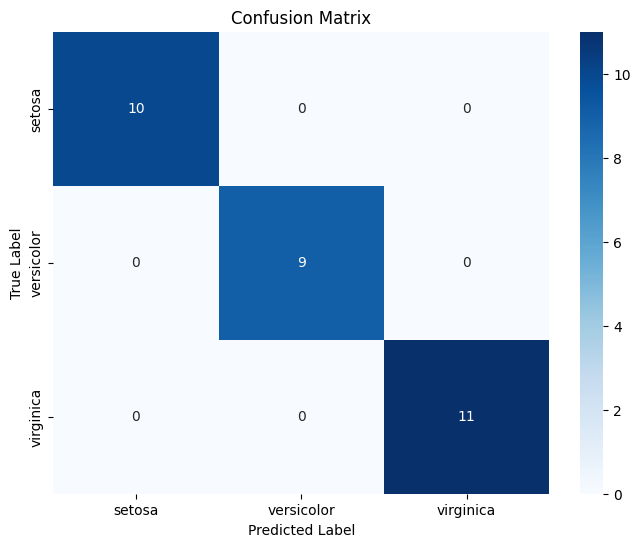

In [40]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), predicted_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


For Breast Cancer Data

In [81]:
from sklearn.datasets import load_breast_cancer

# Load Breast Cancer dataset
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# One-hot encode the target variable (not necessary for binary classification)
# Since TELMClassifier assumes multi-class classification, we'll one-hot encode
# the target variable. However, for binary classification like breast cancer detection,
# one-hot encoding is not necessary. You can directly use the original labels.
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Normalizing input data
X_train_normalized = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test_normalized = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)

# Initialize and train the TELM classifier
input_size = X_train_normalized.shape[1]
hidden_size1 = 100
hidden_size2 = 100
output_size = y_onehot.shape[1]

telm = TELMClassifier_N(input_size, hidden_size1, hidden_size2, output_size)
telm.train(X_train_normalized, y_train)

# Make predictions on the test set
y_pred = telm.predict(X_test_normalized)
predicted_labels = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.9736842105263158


C:\Users\pulki\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


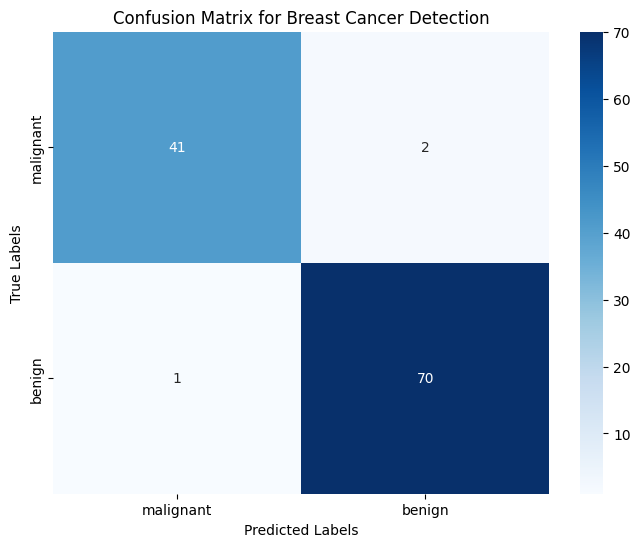

In [82]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), predicted_labels)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=breast_cancer.target_names, yticklabels=breast_cancer.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Breast Cancer Detection')
plt.show()

For California Price Prediction

In [119]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

class TELMRegressor_N:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, k=2):
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.output_size = output_size
        self.k = k

        # Initialize random weights and biases for the first hidden layer
        self.weights1 = np.random.randn(input_size // k, hidden_size1, k)
        self.bias1 = np.random.randn(hidden_size1)

        # Initialize random weights and biases for the second hidden layer
        self.weights2 = np.random.randn(hidden_size1, hidden_size2)
        self.bias2 = np.random.randn(hidden_size2)

        # Initialize output weights randomly
        self.output_weights = None

    def train(self, X, y):
        # Compute the output of the first hidden layer
        hidden_output1 = np.zeros((X.shape[0], self.hidden_size1))
        for i in range(0, self.input_size, self.k):
            group_input = X[:, i:i+self.k]
            weights1_group = self.weights1[i//self.k].T
            hidden_output1 += np.dot(group_input, weights1_group) + self.bias1

        hidden_output1 = np.maximum(hidden_output1, 0)  # ReLU activation

        # Compute the output of the second hidden layer
        hidden_output2 = np.dot(hidden_output1, self.weights2) + self.bias2
        hidden_output2 = np.maximum(hidden_output2, 0)  # ReLU activation

        # Compute output weights using Moore-Penrose pseudoinverse
        self.output_weights = np.linalg.pinv(hidden_output2) @ y

    def predict(self, X):
        # Compute the output of the first hidden layer
        hidden_output1 = np.zeros((X.shape[0], self.hidden_size1))
        for i in range(0, self.input_size, self.k):
            group_input = X[:, i:i+self.k]
            weights1_group = self.weights1[i//self.k].T
            hidden_output1 += np.dot(group_input, weights1_group) + self.bias1

        hidden_output1 = np.maximum(hidden_output1, 0)  # ReLU activation

        # Compute the output of the second hidden layer
        hidden_output2 = np.dot(hidden_output1, self.weights2) + self.bias2
        hidden_output2 = np.maximum(hidden_output2, 0)  # ReLU activation

        # Compute the output
        output = hidden_output2 @ self.output_weights
        return output

# Load California housing price dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the TELM regressor
input_size = X_train_scaled.shape[1]
hidden_size1 = 100
hidden_size2 = 100
output_size = 1  # Single output for regression
telm = TELMRegressor_N(input_size, hidden_size1, hidden_size2, output_size, k=2)
telm.train(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = telm.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.4122969587546081


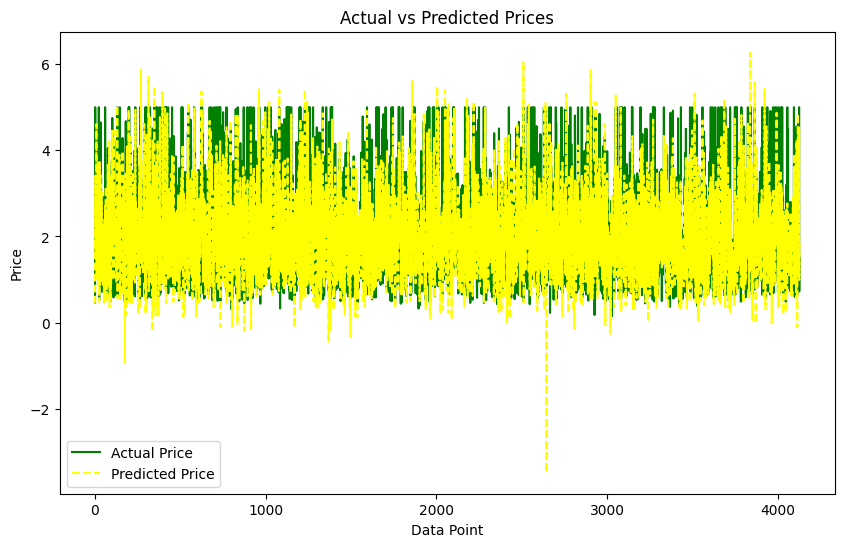

In [107]:
import matplotlib.pyplot as plt

# Plot actual and predicted prices
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, color='green', label='Actual Price')
plt.plot(range(len(y_test)), y_pred, color='yellow', linestyle='--', label='Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Data Point')
plt.ylabel('Price')
plt.legend()
plt.show()


# Implementaion of Advanced version of TELM with usage of k as the grouping factor

In [86]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

class TELMClassifier_kgroup:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.output_size = output_size

        # Initialize random weights and biases for the two hidden layers
        self.weights1 = np.random.randn(input_size, hidden_size1)
        self.bias1 = np.random.randn(hidden_size1)
        self.weights2 = np.random.randn(hidden_size1, hidden_size2)
        self.bias2 = np.random.randn(hidden_size2)

        # Initialize output weights randomly
        self.output_weights = None

    def train(self, X, y):
        # Compute the output of the first hidden layer
        hidden_output1 = np.dot(X, self.weights1) + self.bias1
        hidden_output1 = np.maximum(hidden_output1, 0)  # ReLU activation

        # Compute the output of the second hidden layer
        hidden_output2 = np.dot(hidden_output1, self.weights2) + self.bias2
        hidden_output2 = np.maximum(hidden_output2, 0)  # ReLU activation

        # Compute output weights using Moore-Penrose pseudoinverse
        self.output_weights = np.linalg.pinv(hidden_output2) @ y

    def predict(self, X):
        # Compute the output of the first hidden layer
        hidden_output1 = np.dot(X, self.weights1) + self.bias1
        hidden_output1 = np.maximum(hidden_output1, 0)  # ReLU activation

        # Compute the output of the second hidden layer
        hidden_output2 = np.dot(hidden_output1, self.weights2) + self.bias2
        hidden_output2 = np.maximum(hidden_output2, 0)  # ReLU activation

        # Compute the output
        output = hidden_output2 @ self.output_weights
        return output

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# One-hot encode the target variable
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Initialize and train the TELM classifier
input_size = X_train.shape[1]
hidden_size1 = 100
hidden_size2 = 100
output_size = y_onehot.shape[1]

telm = TELMClassifier_kgroup(input_size, hidden_size1, hidden_size2, output_size)
telm.train(X_train, y_train)

# Make predictions on the test set
y_pred = telm.predict(X_test)
predicted_labels = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), predicted_labels)
print("Accuracy:", accuracy)


Accuracy: 1.0


C:\Users\pulki\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


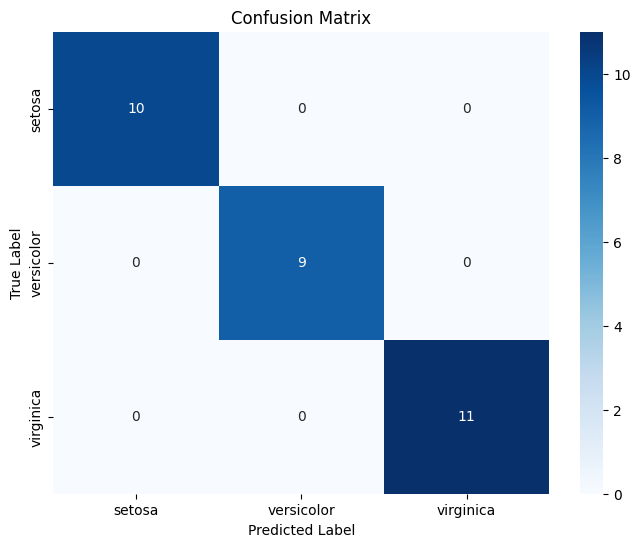

In [87]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), predicted_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


For Breast Cancer Data

In [141]:
from sklearn.datasets import load_breast_cancer

# Load Breast Cancer dataset
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# One-hot encode the target variable (not necessary for binary classification)
# Since TELMClassifier assumes multi-class classification, we'll one-hot encode
# the target variable. However, for binary classification like breast cancer detection,
# one-hot encoding is not necessary. You can directly use the original labels.
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=28)

# Normalizing input data
X_train_normalized = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test_normalized = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)

# Initialize and train the TELM classifier
input_size = X_train_normalized.shape[1]
hidden_size1 = 100
hidden_size2 = 100
output_size = y_onehot.shape[1]

telm = TELMClassifier_kgroup(input_size, hidden_size1, hidden_size2, output_size)
telm.train(X_train_normalized, y_train)

# Make predictions on the test set
y_pred = telm.predict(X_test_normalized)
predicted_labels = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.9736842105263158


C:\Users\pulki\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


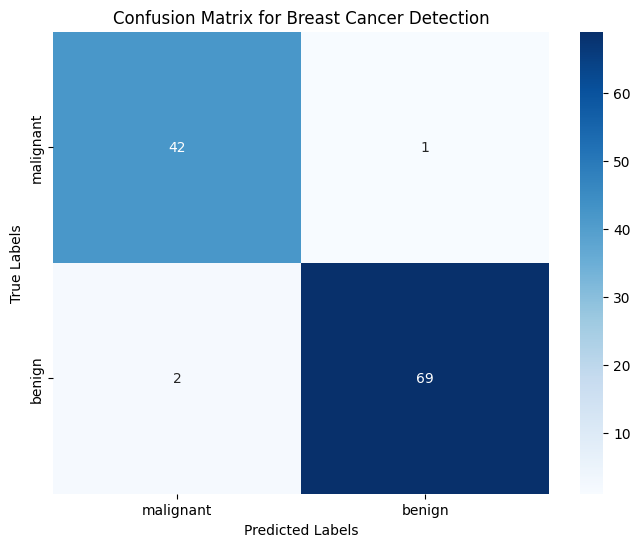

In [100]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), predicted_labels)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=breast_cancer.target_names, yticklabels=breast_cancer.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Breast Cancer Detection')
plt.show()

For California House Price Prediction

In [170]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

class TELMRegressor_kgroup:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.output_size = output_size

        # Initialize random weights and biases for the two hidden layers
        self.weights1 = np.random.randn(input_size, hidden_size1)
        self.bias1 = np.random.randn(hidden_size1)
        self.weights2 = np.random.randn(hidden_size1, hidden_size2)
        self.bias2 = np.random.randn(hidden_size2)

        # Initialize output weights randomly
        self.output_weights = None

    def train(self, X, y):
        # Compute the output of the first hidden layer
        hidden_output1 = np.dot(X, self.weights1) + self.bias1
        hidden_output1 = np.maximum(hidden_output1, 0)  # ReLU activation

        # Compute the output of the second hidden layer
        hidden_output2 = np.dot(hidden_output1, self.weights2) + self.bias2
        hidden_output2 = np.maximum(hidden_output2, 0)  # ReLU activation

        # Compute output weights using Moore-Penrose pseudoinverse
        self.output_weights = np.linalg.pinv(hidden_output2) @ y

    def predict(self, X):
        # Compute the output of the first hidden layer
        hidden_output1 = np.dot(X, self.weights1) + self.bias1
        hidden_output1 = np.maximum(hidden_output1, 0)  # ReLU activation

        # Compute the output of the second hidden layer
        hidden_output2 = np.dot(hidden_output1, self.weights2) + self.bias2
        hidden_output2 = np.maximum(hidden_output2, 0)  # ReLU activation

        # Compute the output
        output = hidden_output2 @ self.output_weights
        return output

# Load California housing price dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the TELM regressor
input_size = X_train_scaled.shape[1]
hidden_size1 = 100
hidden_size2 = 100
output_size = 1  # Single output for regression
telm = TELMRegressor_kgroup(input_size, hidden_size1, hidden_size2, output_size)
telm.train(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = telm.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.44992651509848736


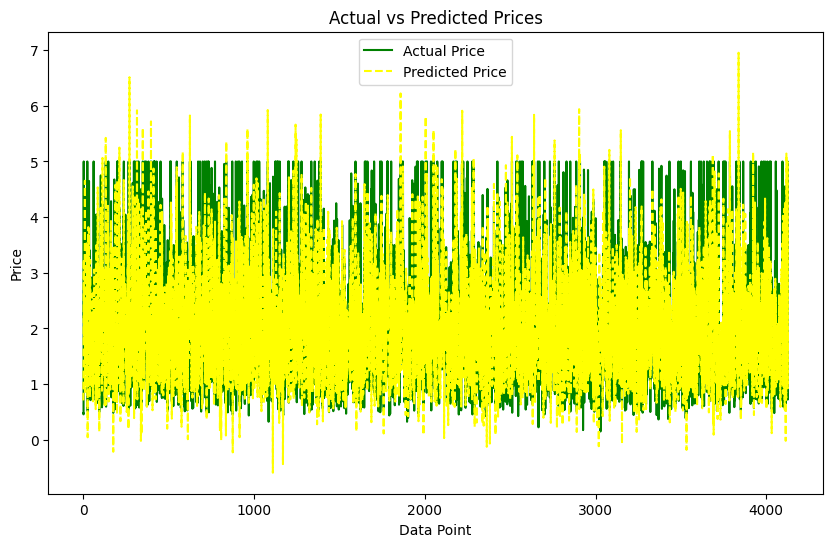

In [112]:
import matplotlib.pyplot as plt

# Plot actual and predicted prices
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, color='green', label='Actual Price')
plt.plot(range(len(y_test)), y_pred, color='yellow', linestyle='--', label='Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Data Point')
plt.ylabel('Price')
plt.legend()
plt.show()


sentiments classfication using textual data (news article)- learn preprocessing and steps 
Textual data preparation 
email spam classification

Data Preprocessing-

Data Cleaning:
Handling missing values: This involves strategies like imputation (replacing missing values with a calculated value), deletion of rows or columns with missing values, or using algorithms that can handle missing data.
Handling noisy data: Outliers or noisy data points can be identified and treated through techniques like smoothing, binning, or outlier detection and removal.

Data Integration:
Combining data from multiple sources into one coherent dataset. This may involve resolving inconsistencies in data formats, attribute naming conventions, etc.

Data Transformation:
-Normalization: Scaling numerical features to a standard range (e.g., between 0 and 1) to ensure that different features contribute equally to model training and avoid dominance by features with larger scales.
-Standardization: Scaling numerical features to have a mean of 0 and a standard deviation of 1. It helps when the features have different units or scales.
-Encoding categorical variables: Converting categorical variables into numerical format suitable for machine learning algorithms. Common techniques include one-hot encoding, label encoding, and ordinal encoding.
-Feature engineering: Creating new features or transforming existing ones to better represent the underlying patterns in the data. This might involve techniques like polynomial features, logarithmic transformations, or feature extraction from text or images.

Data Reduction:
Dimensionality reduction: Techniques like Principal Component Analysis (PCA) or Singular Value Decomposition (SVD) are used to reduce the number of features while preserving most of the information. This can help in speeding up training and reducing the risk of overfitting.
Feature selection: Identifying and selecting the most relevant features for model training, based on criteria like feature importance scores, correlation analysis, or domain knowledge.

Data Discretization:
Binning: Grouping continuous numerical data into discrete bins or intervals. This can simplify the data and help uncover patterns, especially in cases where the relationship between the feature and the target variable is nonlinear.

# Next


Steps for using this in email spam classficiation-

Data Collection:
Gather a dataset of emails labeled as spam or non-spam (ham). You can use publicly available datasets or create your own labeled dataset.

Data Exploration:
Explore the dataset to understand its structure, features, and distributions. This includes checking for the number of samples, the distribution of spam vs. non-spam emails, and the characteristics of the email content (e.g., length of emails, frequency of certain words).

Data Cleaning:
Remove any duplicate emails to ensure data integrity.
Handle missing values if present (unlikely in text data).
Perform text preprocessing steps such as removing special characters, punctuation, and stop words.

Tokenization:
Tokenize the text data by breaking it into individual words or tokens. This step converts the raw text into a format suitable for further analysis.
Normalization and Standardization:
Convert all text to lowercase to ensure uniformity.
Perform stemming or lemmatization to reduce words to their base form (e.g., "running" to "run").

Feature Extraction:
Convert the text data into numerical features that machine learning algorithms can process. Common techniques include:
Bag-of-Words (BoW): Representing each email as a vector of word counts.
TF-IDF (Term Frequency-Inverse Document Frequency): Assigning weights to words based on their frequency in the document and across the entire dataset.
Word embeddings: Using pre-trained word embeddings (e.g., Word2Vec, GloVe) to represent words as dense vectors.

Data Splitting:
Split the dataset into training and testing sets to evaluate the performance of the trained model on unseen data. A typical split might be 80% for training and 20% for testing.

Model Training:
Choose an appropriate machine learning algorithm for email spam classification.Train the chosen model on the training data.